# ChainRuleSampling-2D.ipynb
Exact chain-rule sampling for a 2D toy distribution

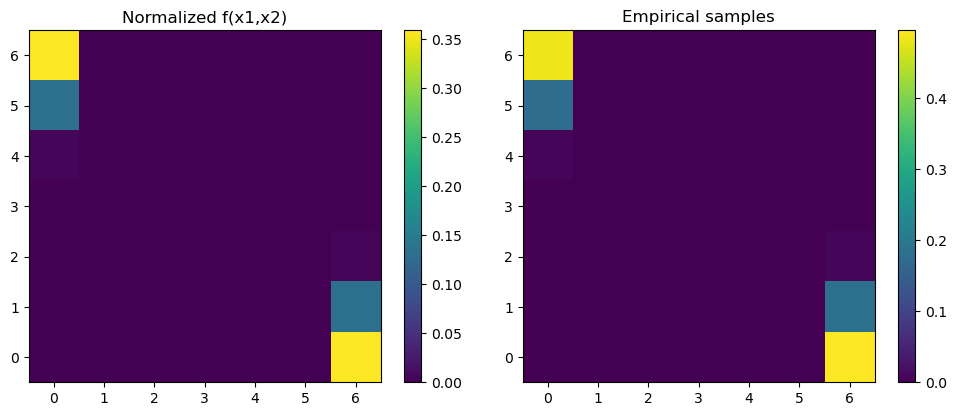

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs("figs", exist_ok=True)

xs = np.arange(-3,4)
def f(x1,x2):
    return np.exp(-(x1**2) - 2*x1*x2 + 0.2*(x2**2))

# Precompute f-grid
F = np.array([[f(i,j) for j in xs] for i in xs])
Z1 = np.sum(F, axis=1)
Z = np.sum(Z1)

# Exact sampling
N = 20000
samples=[]
for _ in range(N):
    p1 = Z1/Z
    x1 = np.random.choice(xs, p=p1)
    idx = np.where(xs==x1)[0][0]
    p2 = F[idx] / np.sum(F[idx])
    x2 = np.random.choice(xs, p=p2)
    samples.append([x1,x2])

samples = np.array(samples)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Normalized f(x1,x2)")
plt.imshow(F/np.sum(F), origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Empirical samples")
H,_,_ = np.histogram2d(samples[:,0], samples[:,1], bins=7,
                       range=[[-3,3],[-3,3]], density=True)
plt.imshow(H, origin='lower')
plt.colorbar()

plt.tight_layout()
plt.savefig("figs/ChainRule_2D_exact_samples.png")
plt.show()
